In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')
#df=pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [52]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [54]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [55]:
df.duplicated().sum()

0

<AxesSubplot:>

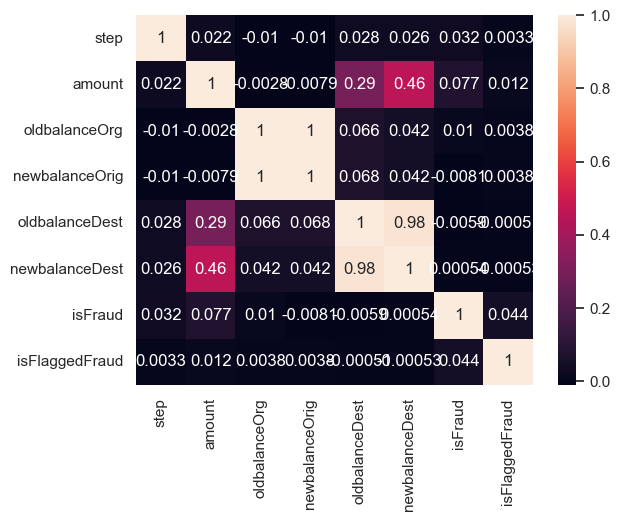

In [56]:
sns.heatmap(df.corr(), annot = True)

In [57]:
# Define the thresholds for high, mid, and low balance
high_threshold = df['amount'].quantile(0.75)
mid_threshold = df['amount'].quantile(0.5)
low_threshold = df['amount'].quantile(0.25)

# Define a function to categorize the balance column
def categorize_balance(balance):
    if balance >= high_threshold:
        return 'high'
    elif balance >= mid_threshold:
        return 'mid'
    else:
        return 'low'

# Create a new column called balance_category by applying the categorize_balance function to the balance column
df['amount_cat'] = df['amount'].apply(categorize_balance)

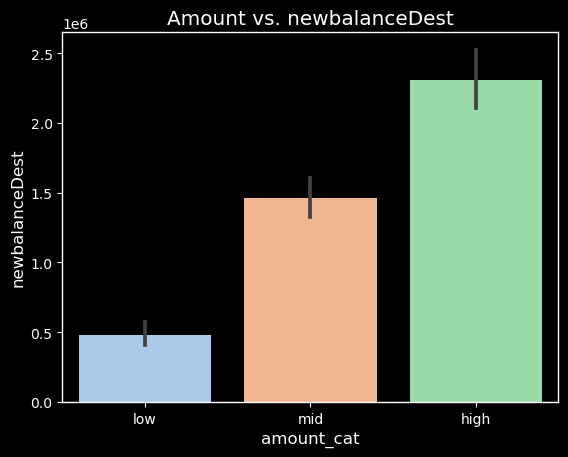

In [25]:
sns.barplot(data = df.sample(5000), x= 'amount_cat', y = 'newbalanceDest', palette='pastel')
plt.title('Amount vs. newbalanceDest')
plt.style.use('ggplot')
plt.grid(visible=False)
plt.style.use('dark_background')

In [58]:
fraud = df[df['isFraud'] == 1]
fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

Text(0.5, 1.0, 'isFraud vs. amount')

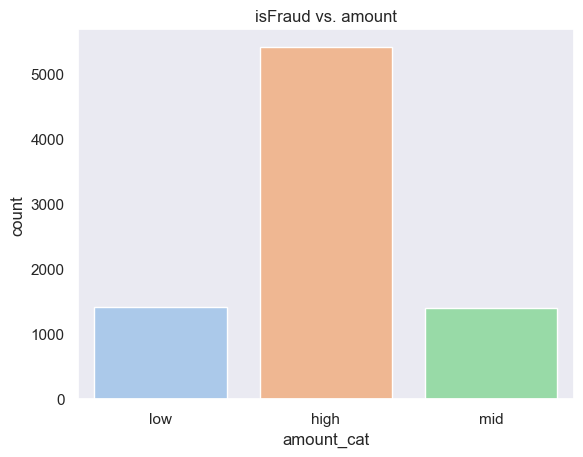

In [74]:
sns.countplot(data = fraud, x = 'amount_cat', palette='pastel')
plt.title('isFraud vs. amount')